# Continuous random variables: probability functions

Statistics:  
- [Related distributions](https://www.itl.nist.gov/div898/handbook/eda/section3/eda362.htm) (NIST)

Visualization: 
- [An example of horizontal color bar](https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/contour_demo.html#sphx-glr-gallery-images-contours-and-fields-contour-demo-py) (from matplotlib contour demo)
- [Matplotlib spines demo](https://matplotlib.org/examples/ticks_and_spines/spines_demo.html)
- [Matplotlib change axis intersection point](https://jdhao.github.io/2018/05/21/matplotlib-change-axis-intersection-point/) (jdhao's blog)
- [Arrow in plot matplotlib pyplot](https://stackoverflow.com/questions/53538909/arrow-in-plot-matplotlib-pyplot) (stackoverflow)

# Imports

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

# The normal distribution

# Probability Density Function (PDF)

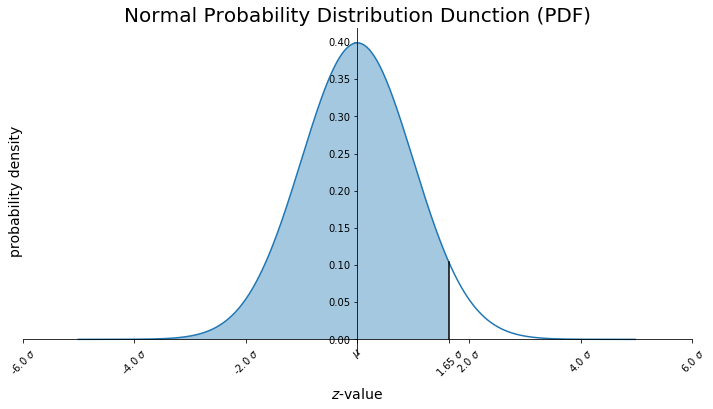

In [2]:
# Data
h = .02
z = np.arange(-5, 5, h)
p = norm.pdf(z)

zval0 = 1.65
z0 = np.arange(-5, zval0, h)
c0 = norm.pdf(z0)
cval0 = c0[-1]

# Visualization
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(z, p)
ax.fill_between(z0, 0, c0, alpha=.4)
ax.plot([zval0, zval0], [0, cval0], 'k')

ax.spines['left'].set_position(('data', 0))
ax.yaxis.set_label_coords(0, .5)

ax.spines['bottom'].set_position(('data', 0))
# ax.spines['bottom'].set_bounds(-1, 1)
ax.xaxis.set_label_coords(.5, -0.1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xticks(np.append(ax.get_xticks(), zval0))
ax.set_xticklabels([f"{x} $\sigma$" if x != 0 else "$\mu$" for x in ax.get_xticks()], rotation=45)
ax.set_title("Normal Probability Distribution Dunction (PDF)", fontsize=20)
ax.set_xlabel("$z$-value", fontsize=14)
ax.set_ylabel("probability density", fontsize=14)
ax.grid(False);

# Cumulative Density Function (CDF)

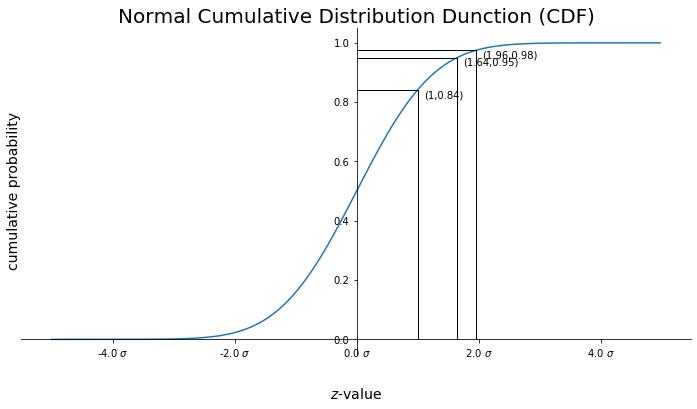

In [3]:
# Data
h = .02
z = np.arange(-5, 5, h)
c = norm.cdf(z)

# Visualization
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(z, c)

for zval in [1, 1.64, 1.96]:
    cval = norm.cdf(zval)
    ax.plot([zval, zval, 0], [0, cval, cval], 'k', linewidth=1)
    ax.text(zval + .1, cval, f"({zval},{cval:.2f})", # f"z={zval}$\sigma$, c={cval:.0%}"
            horizontalalignment='left',
            verticalalignment='top',
            fontsize=10
           )


ax.spines['left'].set_position(('data', 0))
ax.yaxis.set_label_coords(0, .5)

ax.spines['bottom'].set_position(('data', 0))
ax.xaxis.set_label_coords(.5, -0.1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xticklabels([f"{x} $\sigma$" for x in ax.get_xticks()])
ax.set_title("Normal Cumulative Distribution Dunction (CDF)", fontsize=20)
ax.set_xlabel("$z$-value", fontsize=14)
ax.set_ylabel("cumulative probability", fontsize=14)

ax.grid(False);

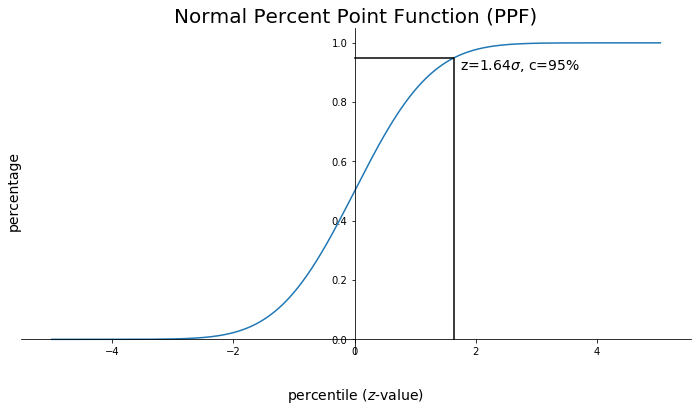

In [4]:
k = 1 - norm.cdf(5)
p = np.arange(k, 1, k)
z = norm.ppf(p)

p0 = .95
z0 = norm.ppf(p0)

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(z, p)

ax.plot([z0, z0, 0], [0, p0, p0], 'k')
ax.text(z0 + .1, p0, f"z={z0:.2f}$\sigma$, c={p0:.0%}", 
        horizontalalignment='left',
        verticalalignment='top',
        fontsize=14
       )
ax.spines['left'].set_position(('data', 0))
ax.yaxis.set_label_coords(0, .5)

ax.spines['bottom'].set_position(('data', 0))
ax.xaxis.set_label_coords(.5, -0.1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)



ax.set_title("Normal Percent Point Function (PPF)", fontsize=20)
ax.set_xlabel("percentile ($z$-value)", fontsize=14)
ax.set_ylabel("percentage", fontsize=14)

ax.grid(False);

# Confidence intervals

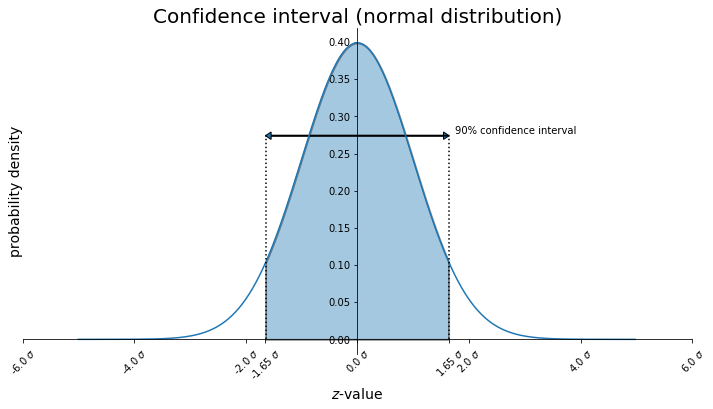

In [5]:
# PDF
h = 0.02
z = np.arange(-5, 5, h)
p = norm.pdf(z)

# Confidence and threshold values
alpha0 = .9
c0 = (1+alpha0)/2
z_high = norm.ppf(c0)
z_low = -norm.ppf(c0)

zci = np.arange(z_low, z_high, h)
pci = norm.pdf(zci)

h_arrow = .274 # height of horizontal arrow

# Visualization
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(z, p)
ax.fill_between(zci, 0, pci, alpha=.4, edgecolor='k', linewidth=2)
# ax.plot([zci[0], zci[0]], [0, pci[0]], 'k')

ax.spines['left'].set_position(('data', 0))
ax.yaxis.set_label_coords(0, .5)

ax.spines['bottom'].set_position(('data', 0))
# ax.spines['bottom'].set_bounds(-1, 1)
ax.xaxis.set_label_coords(.5, -0.1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.arrow(z_low, h_arrow, z_high - z_low, 0,
         # shape='full', 
         head_width=.01, head_length=.1, length_includes_head=True)
ax.arrow(z_high, h_arrow, - (z_high - z_low), 0,
         # shape='full', 
         head_width=.01, head_length=.1, length_includes_head=True)

ax.plot([z_low, z_low], [0, h_arrow], 'k:')
ax.plot([z_high, z_high], [0, h_arrow], 'k:')

ax.text(z_high + .1, h_arrow, f"{alpha0:.0%} confidence interval", horizontalalignment='left', verticalalignment='bottom')


ax.set_xticks(np.append(ax.get_xticks(), [zval0, -zval0]))
ax.set_xticklabels([f"{x} $\sigma$" for x in ax.get_xticks()], rotation=45)
ax.set_title("Confidence interval (normal distribution)", fontsize=20)
ax.set_xlabel("$z$-value", fontsize=14)
ax.set_ylabel("probability density", fontsize=14)
ax.grid(False);

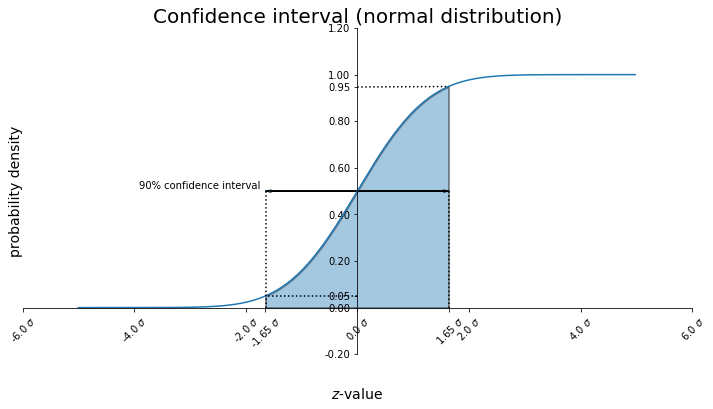

In [6]:
# CDF
h = 0.02
z = np.arange(-5, 5, h)
c = norm.cdf(z)

# Confidence and threshold values
alpha0 = .9
c0 = (1+alpha0)/2
z_high = norm.ppf(c0)
z_low = -norm.ppf(c0)
# SHORT VERSION
# z_low, z_high = norm.interval(alpha0)

zci = np.arange(z_low, z_high, h)
cci = norm.cdf(zci)

h_arrow = .5 # height of horizontal arrow

# Visualization
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(z, c)
ax.fill_between(zci, 0, cci, alpha=.4, edgecolor='k', linewidth=2)

ax.spines['left'].set_position(('data', 0))
ax.yaxis.set_label_coords(0, .5)

ax.spines['bottom'].set_position(('data', 0))
# ax.spines['bottom'].set_bounds(-1, 1)
ax.xaxis.set_label_coords(.5, -0.1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.arrow(z_low, h_arrow, z_high - z_low, 0,
         # shape='full', 
         head_width=.01, head_length=.1, length_includes_head=True)
ax.arrow(z_high, h_arrow, - (z_high - z_low), 0,
         # shape='full', 
         head_width=.01, head_length=.1, length_includes_head=True)

ax.plot([z_low, z_low], [0, h_arrow], 'k:')
ax.plot([z_high, z_high], [0, h_arrow], 'k:')

ax.plot([0, z_low], [cci[0], cci[0]], 'k:')
ax.plot([0, z_high], [cci[-2], cci[-1]], 'k:')


ax.text(z_low - .1, h_arrow, f"{alpha0:.0%} confidence interval", horizontalalignment='right', verticalalignment='bottom')


ax.set_xticks(np.append(ax.get_xticks(), [zval0, -zval0]))
ax.set_xticklabels([f"{x} $\sigma$" for x in ax.get_xticks()], rotation=45)

ax.set_yticks(np.append(ax.get_yticks(), [cci[0], cci[-1]]))
ax.set_yticklabels([f"{x:.2f}" for x in ax.get_yticks()], rotation=0)



ax.set_title("Confidence interval (normal distribution)", fontsize=20)
ax.set_xlabel("$z$-value", fontsize=14)
ax.set_ylabel("probability density", fontsize=14)
ax.grid(False);